## Visual Analytics Assignment

### Bank Customer Data

#### Objective: Find key insights in the data using visualisations 
#### Business Objective of Bank: How to increase the revenue and reduce the cost

In [1]:
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
%matplotlib inline

In [4]:
data = pd.read_csv("C:/Users/Race-class4/Desktop/Visualization/Visual Analytics_Banking.csv")

In [5]:
data.head()

,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance
0,100000001,Simon,Walsh,Male,21,England,White Collar,05.Jan.15,113810.15
1,400000002,Jasmine,Miller,Female,34,Northern Ireland,Blue Collar,06.Jan.15,36919.73
2,100000003,Liam,Brown,Male,46,England,White Collar,07.Jan.15,101536.83
3,300000004,Trevor,Parr,Male,32,Wales,White Collar,08.Jan.15,1421.52
4,100000005,Deirdre,Pullman,Female,38,England,Blue Collar,09.Jan.15,35639.79


In [6]:
data.shape

(4014, 9)

In [11]:
summary = data.describe(include='all')
summary.transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Customer ID,4014,NaN,NaN,NaN,1.69683e+08,8.86537e+07,1e+08,1.00002e+08,1.00004e+08,2.00003e+08,4.00004e+08
Name,4014,172,Jason,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Surname,4014,150,Kerr,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,4014,2,Male,2165,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,4014,NaN,NaN,NaN,38.6111,9.81912,15,31,37,45,64
Region,4014,4,England,2159,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job Classification,4014,3,White Collar,1955,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date Joined,4014,307,24.Sep.15,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Balance,4014,NaN,NaN,NaN,39766.4,29859.5,11.52,16115.4,33567.3,57533.9,183468


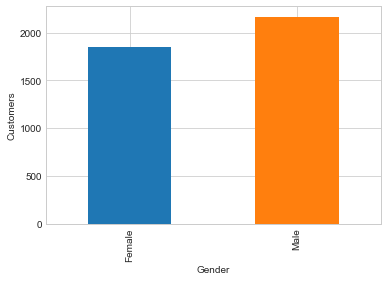

In [41]:
df = data.sort_values('Balance', ascending=False)
plt.xlabel('Gender')
plt.ylabel('Customers')
df.groupby('Gender').size().plot(kind='bar')

(array([ 54., 182., 482., 801., 797., 616., 452., 332., 202.,  96.]),
 array([15. , 19.9, 24.8, 29.7, 34.6, 39.5, 44.4, 49.3, 54.2, 59.1, 64. ]),
 <a list of 10 Patch objects>)

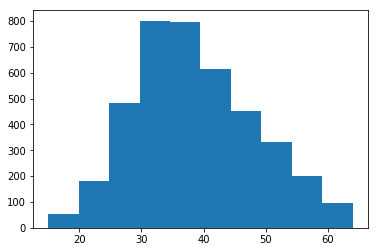

In [13]:
plt.hist(df['Age'],bins = 10)

In [14]:
df = data.iloc[:,3:9]
corr = df.corr()
corr.style.background_gradient().set_precision(1)

,Age,Balance
Age,1,0.009
Balance,0.009,1


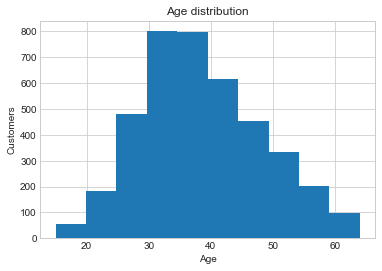

In [40]:
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(df['Age'],bins = 10) # Bins set to 10
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Customers')
plt.show()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


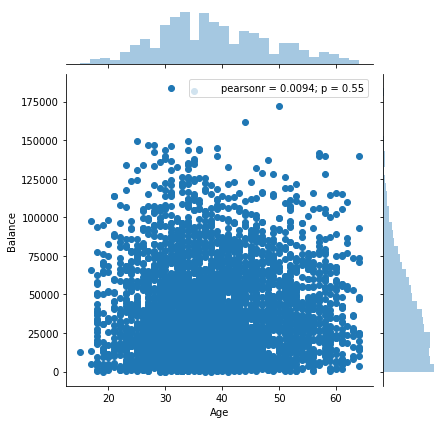

In [16]:
g = sns.jointplot(x="Age", y="Balance", data=df)

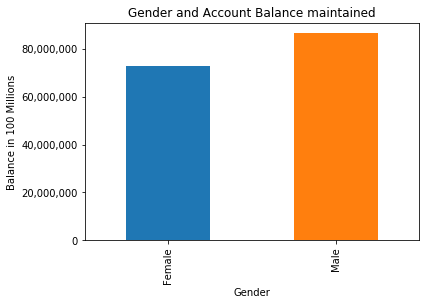

In [17]:
var = df.groupby('Gender').Balance.sum() #grouped sum of balance at Gender level
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax1.set_xlabel('Gender')
ax1.set_ylabel('Balance in 100 Millions')
ax1.set_title("Gender and Account Balance maintained")
var.plot(kind='bar')

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


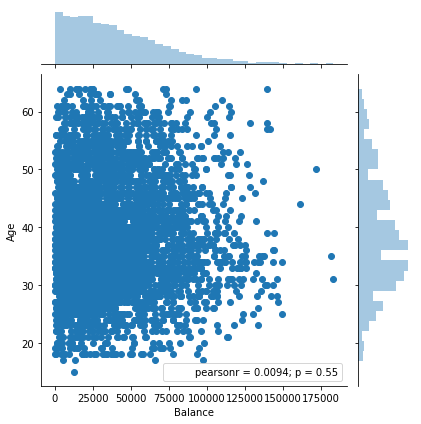

In [20]:
g = sns.jointplot(x="Balance", y="Age", data=df)

In [49]:
sns.xlabel('Age')
sns.ylabel('Customers')
ax = sns.distplot(df['Age'], kde=False, color ='r', bins=10);
ax.set(xlabel='common xlabel', ylabel='common ylabel')
plt.show()

AttributeError: module 'seaborn' has no attribute 'xlabel'

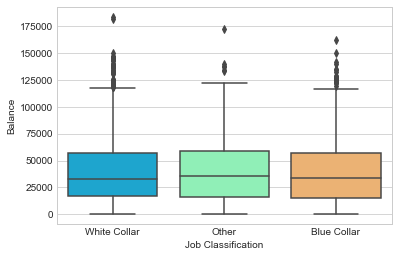

In [51]:
box = sns.boxplot(x="Job Classification", y="Balance", data=df, palette="rainbow")

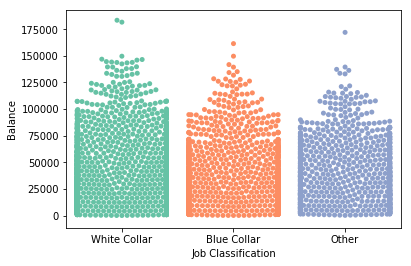

In [25]:
sns.swarmplot(x="Job Classification", y="Balance", data=df, palette="Set2")

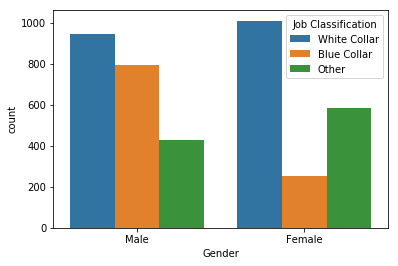

In [27]:
a=sns.countplot(x="Gender", data=df, hue="Job Classification")

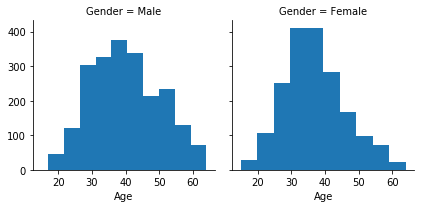

In [29]:
g = sns.FacetGrid(col='Gender', data=df)
g.map(plt.hist,'Age',bins=10)

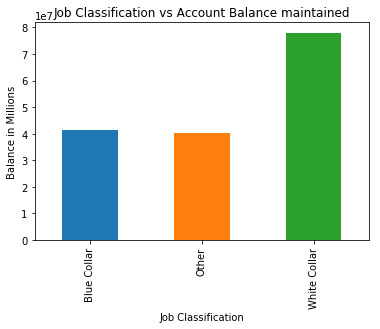

In [19]:
var = df.groupby('Job Classification').Balance.sum() #grouped sum of balance at Gender level
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Job Classification')
ax1.set_ylabel("Balance in Millions")
ax1.set_title("Job Classification vs Account Balance maintained")
var.plot(kind='bar')

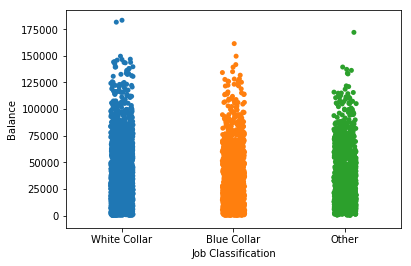

In [38]:
sns.stripplot(x="Job Classification", y="Balance", data=df, jitter=True);

In [34]:
var = df.groupby('Region').Balance.sum()
var

Region
England             84833397.00
Northern Ireland     8335566.39
Scotland            44410730.72
Wales               22042829.26
Name: Balance, dtype: float64

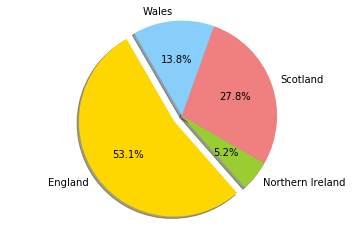

In [32]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = 'England', 'Northern Ireland', 'Scotland', 'Wales' 
sizes = [84833397.00, 8335566.39, 44410730.72, 22042829.26]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=120)
 
plt.axis('equal')
plt.show()